In [23]:
#
%matplotlib inline
from matplotlib import rcParams

import sys 
sys.path.append('/global/homes/m/mehdi/github/DESILSS')
import plotting
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ls $SCRATCH/dr5_anand/eboss/

clustering/              ebossELGngal-features-masked.fits
dr5hpmask256.fits        ebossELGngal-features.fits
eBOSS.ELG.dr5.fits       regression/
eBOSS.ELGRANhpmap.fits   sysmaps256/
eBOSS.ELGhpmap.fits      test_train_eboss_dr5-masked.npy
eBOSS.ELGhpmap1024.fits


In [3]:
elgmap = hp.read_map('/global/cscratch1/sd/mehdi/dr5_anand/eboss/eBOSS.ELGhpmap.fits')
mask   = hp.read_map('/global/cscratch1/sd/mehdi/dr5_anand/eboss/dr5hpmask256.fits')

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [4]:
elgmap[~mask.astype('bool')] = 0.0

In [12]:
def IndexToDeclRa(index, NSIDE):
    theta,phi=hp.pixelfunc.pix2ang(NSIDE,index)
    return -np.degrees(theta-np.pi/2.),np.degrees(phi) # phi?

In [15]:
ihpix = np.argwhere(mask !=0.0).flatten()
dec, ra = IndexToDeclRa(ihpix, 256)

In [18]:
from matplotlib.patches import Rectangle

In [40]:
plt.rc('font', size=20, family='serif')

In [44]:
dec.max(), (dec >=35).sum()/ dec.size

(35.685334712652043, 0.00041035068569599578)

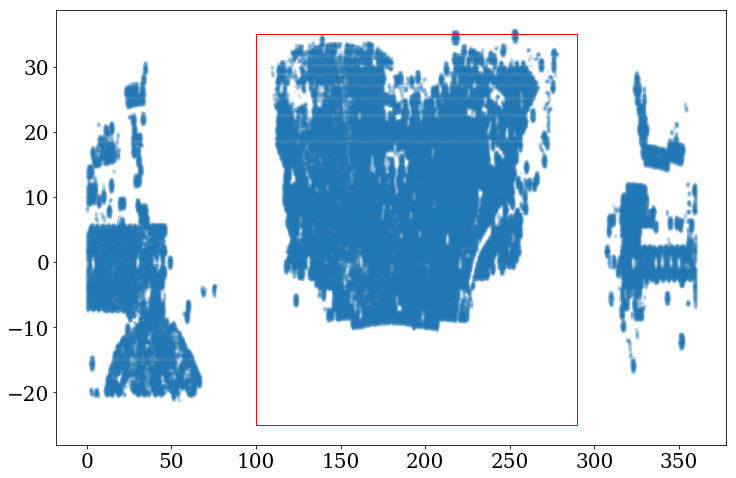

In [41]:
rect = Rectangle((100, -25), 190, 60, color='r', fill=False)
fig1 = plt.figure(figsize=(12, 8))
ax1 = fig1.add_subplot(111)
ax1.add_patch(rect)
ax1.scatter(ra, dec, marker='.', alpha=0.1)

/global/homes/m/mehdi/cori-envs/py3p6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/global/homes/m/mehdi/cori-envs/py3p6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/global/homes/m/mehdi/cori-envs/py3p6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


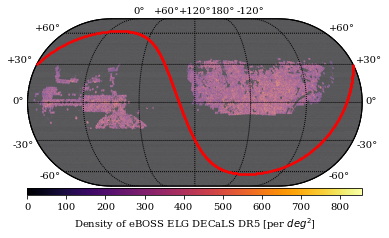

In [9]:
plt.rc('font', family='serif')
#hp.mollview(elgmap, cmap=plt.cm.inferno)
plotting.plot_healpix_map(elgmap/hp.nside2pixarea(256, degrees=True), 
                          label='Density of eBOSS ELG DECaLS DR5 [per $deg^{2}$]', cmap=plt.cm.inferno)
plt.savefig('figs/ebosselg-hpmap2.png', bbox_inches='tight')

In [21]:
path = '/global/homes/m/mehdi/work/dr5/DECaLS_DR5/nside256_oversamp4/'
seeingname = lambda b: path+'DECaLS_DR5_band_'+b+'_nside256_oversamp4_FWHM__min.fits.gz'
depthname  = lambda b: path+'DECaLS_DR5_band_'+b+'_nside256_oversamp4_ivar__total.fits.gz'
airmasname = lambda b: path+'DECaLS_DR5_band_'+b+'_nside256_oversamp4_AIRMASS__mean.fits.gz'
countname = lambda b: path+'DECaLS_DR5_band_'+b+'_nside256_oversamp4_count__fracdet.fits.gz'

In [2]:
import fitsio as ft
import numpy as np

In [30]:
def deptran(ivar):
    """
        function to change IVAR to DEPTH
    """
    depth = nanomaggiesToMag(5./np.sqrt(ivar))
    return depth


def nanomaggiesToMag(nm):
    return -2.5 * (np.log10(nm) - 9.)

def maskmap(data):
    output = np.zeros(12*256*256)
    output[:] = np.nan
    output[data['PIXEL']] = data['SIGNAL']
    return output

In [31]:

bands = ['r','g','z']

# dictionaries to store data
depthl = {}
seeingl = {}
airmassl = {}
countl = {}

for band in bands:
    # reading IVAR
    # IVAR to DEPTH
    dataf           = ft.read(depthname(band))
    dataf['SIGNAL'] = deptran(dataf['SIGNAL'])
    depthl[band]    = maskmap(dataf)
    #
    # reading seeing
    dataf           = ft.read(seeingname(band))
    dataf['SIGNAL']*= 0.262 
    seeingl[band]   = maskmap(dataf)
    #
    # reading airmass
    dataf           = ft.read(airmasname(band))
    airmassl[band]  =  maskmap(dataf)
    #
    # reading count
    dataf          = ft.read(countname(band))
    countl[band] = maskmap(dataf)

/global/homes/m/mehdi/cori-envs/py3p6/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/global/homes/m/mehdi/cori-envs/py3p6/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


Text(0.86,0.9,'z')

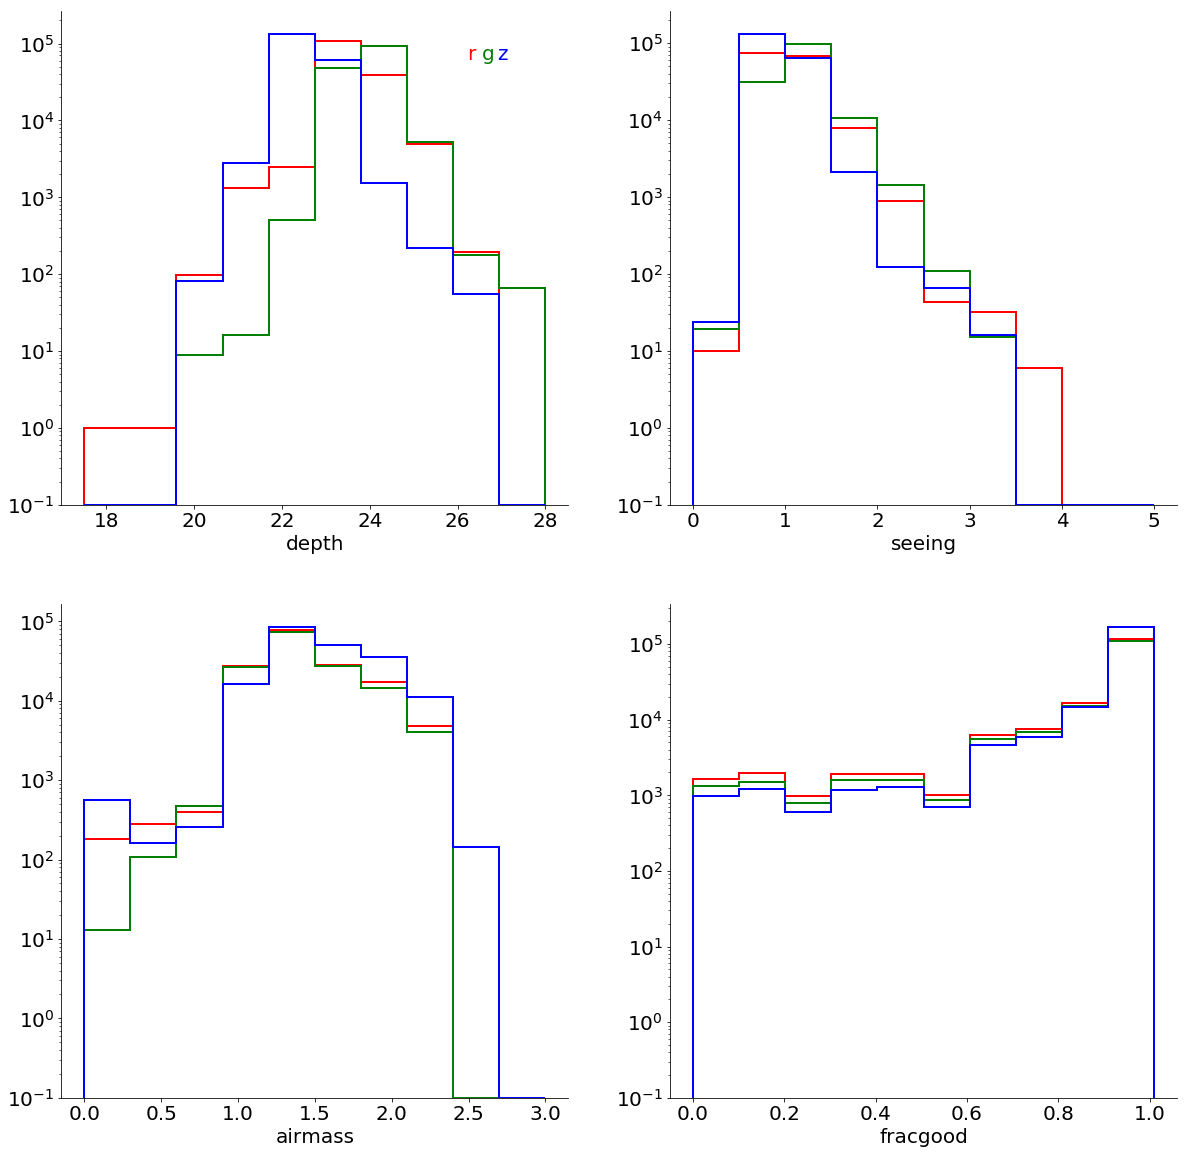

In [61]:
plt.rc('font', size=20)
plt.rc('axes.spines', right=False, top=False)
f,a = plt.subplots(ncols=2, nrows=2, figsize=(20,20))
a = a.flatten()
c = ['r','g','b']
l = ['depth', 'seeing', 'airmass', 'fracgood']
kw = dict(histtype='step', log=True, lw=2)
for i,band in enumerate(bands):
    a[0].hist(depthl[band], color=c[i], 
              range=(17.5, 28), **kw)
    a[1].hist(seeingl[band], color=c[i], 
              range=(0, 5), **kw)
    a[2].hist(airmassl[band], color=c[i], 
              range=(0, 3), **kw)
    a[3].hist(countl[band], color=c[i], 
              range=(0, 1.01), **kw)
for j,a_i in enumerate(a):
    a_i.set_xlabel(l[j])
a[0].text(0.8,0.9, 'r', color='r', transform=a[0].transAxes)
a[0].text(0.83,0.9, 'g', color='g', transform=a[0].transAxes)
a[0].text(0.86,0.9, 'z', color='b', transform=a[0].transAxes)


In [62]:
depc = {'r':21.4, 'z':20.5, 'g':22.0}    # g=24.0, r=23.4, z=22.5
arg = np.ones(12*256**2, 'bool')
for band in bands:
    arg1 = (depthl[band] >= depc[band])
    arg &= arg1
    print("{} pixels had depth > {}".format(arg1.sum(), depc[band]))

154815 pixels had depth > 21.4
145387 pixels had depth > 22.0
198066 pixels had depth > 20.5


/global/homes/m/mehdi/cori-envs/py3p6/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in greater_equal


In [77]:
nan_mask = np.zeros(arg.shape, dtype='?')
for map_i in [depthl, seeingl, airmassl]:
    for band_i in bands:
        nan_mask |= np.isnan(map_i[band_i])

In [80]:
arg &=  (~nan_mask)

In [81]:
print("footprint {} sq. deg.\ntotal sphere {} sq. deg".
      format(arg.sum()*hp.nside2pixarea(256,True),
             arg.size*hp.nside2pixarea(256, True)))

footprint 6617.935304195701 sq. deg.
total sphere 41252.96124941927 sq. deg


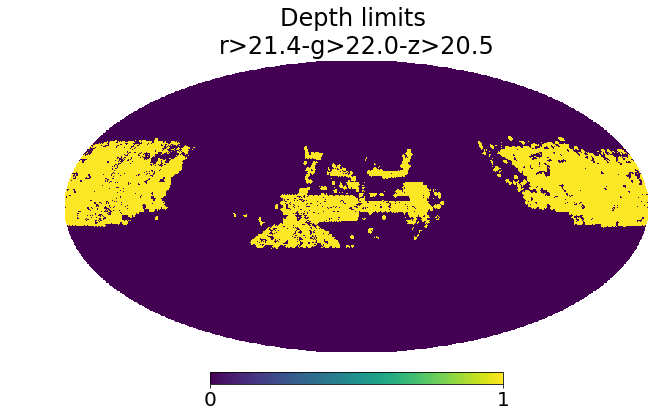

In [82]:
hp.mollview(arg, title='Depth limits \n'+"-".\
            join([band_i+'>'+str(depc[band_i]) for band_i in bands]))

In [65]:
import sys
sys.path.append('/global/homes/m/mehdi/github/DESILSS')
from plotting import plot_healpix_map

/global/homes/m/mehdi/cori-envs/py3p6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/global/homes/m/mehdi/cori-envs/py3p6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/global/homes/m/mehdi/cori-envs/py3p6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


<plotting.init_sky.<locals>.BasemapWithEllipse at 0x2b8fda614a58>

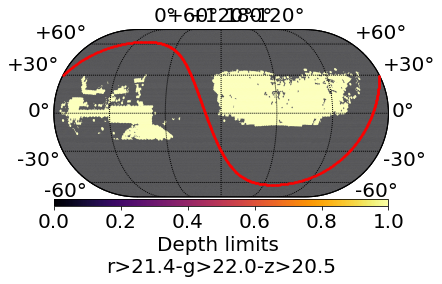

In [66]:
plot_healpix_map(arg, label='Depth limits \n'+"-".\
            join([band_i+'>'+str(depc[band_i]) for band_i in bands]),
                cmap=plt.cm.inferno)

In [83]:
for band in bands:
    print(band, countl[band][arg])
countsall = np.min(np.column_stack([countl[band] for band in bands]), axis=1)

r [ 0.1875  0.0625  0.125  ...,  0.25    0.0625  0.3125]
g [ 0.1875  0.0625  0.125  ...,  0.25    0.0625  0.3125]
z [ 0.1875  0.0625  0.125  ...,  0.25    0.0625  0.3125]


In [84]:
arg2 = arg & (countsall > 0.2)

/global/homes/m/mehdi/cori-envs/py3p6/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


In [85]:
(arg.sum(), arg2.sum())

(126162, 122989)

In [70]:
from syslss import hpixsum

In [71]:
path3 = '/global/cscratch1/sd/mehdi/dr5_anand/'
ps1 = ft.FITS(path3 + 'PS1_17r20.fits')
ps1d = ps1[1].read()
ps1map = hpixsum(256, ps1d['ra'], ps1d['dec'])

In [73]:
ebvn = ft.read('/global/cscratch1/sd/mehdi/healSFD_r_256_fullsky.fits')
ebvr = hp.reorder(ebvn/2.751, n2r=True)

In [86]:
sysmaps = [ebvr[arg2], ps1map[arg2]]
for map_i in [depthl, seeingl, airmassl]:
    for band_i in bands:
        print(np.isnan(map_i[band_i][arg2]).sum())
        sysmaps.append(map_i[band_i][arg2])

0
0
0
0
0
0
0
0
0


In [87]:
allsysmaps = np.column_stack(sysmaps)

In [88]:
%ls /global/cscratch1/sd/mehdi/dr5_anand/


DESI.ELG.dr5.fits*          dr54fold/           eBOSS.ELGhpmap.fits
DESI.ELG.dr5.mskinfo.fits*  dr5aidebv.npy       ngal-features.fits
Masks/                      dr5debv.npy
PS1_17r20.fits              eBOSS.ELG.dr5.fits


In [89]:
elgmap

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [90]:
# select number of galaxies in each pixel as label
label = elgmap[arg2] / countsall[arg2]
# select healpix indices as hpix
hpix = np.argwhere(arg2).flatten()
# initialize the structured numpy array
outdata = np.zeros(allsysmaps.shape[0], 
                   dtype=[('hpix','i8'), ('features',('f8', allsysmaps.shape[1])),
                          ('label','f8'), ('fracgood','f8')]
                  )
outdata['hpix'] = hpix
outdata['features'] = allsysmaps
outdata['label']    = label
outdata['fracgood'] = countsall[arg2]
outdata[:2]

array([ (164044, [  1.97708490e-02,   1.53000000e+02,   2.29920387e+01,   2.34134388e+01,   2.19043694e+01,   1.39091468e+00,   1.56567705e+00,   1.17237628e+00,   2.36999989e+00,   2.35999990e+00,   2.36999989e+00],  0.,  0.25 ),
       (164045, [  1.57435625e-02,   1.71000000e+02,   2.31630440e+01,   2.35465641e+01,   2.20885544e+01,   1.35998750e+00,   1.53722095e+00,   1.15076292e+00,   2.36571407e+00,   2.35999990e+00,   2.36571407e+00],  0.,  0.875)],
      dtype=[('hpix', '<i8'), ('features', '<f8', (11,)), ('label', '<f8'), ('fracgood', '<f8')])

In [91]:
ft.write('/global/cscratch1/sd/mehdi/dr5_anand/ebossELGngal-features.fits',
         outdata, header=dict(features='ebv, nstar, depth, seeing, airmass rgz',
                               fracgood='fracgood',
                               hpix='hpix with nside 256',
                               label='ELG_ngal/fracgood'))

In [66]:
path3 = '/global/cscratch1/sd/mehdi/dr5_anand/eboss/'
outdata, h = ft.read(path3 + "ebossELGngal-features.fits", header=True)

In [67]:
h


XTENSION= 'BINTABLE'           / binary table extension
BITPIX  =                    8 / 8-bit bytes
NAXIS   =                    2 / 2-dimensional binary table
NAXIS1  =                  112 / width of table in bytes
NAXIS2  =               121847 / number of rows in table
PCOUNT  =                    0 / size of special data area
GCOUNT  =                    1 / one data group (required keyword)
TFIELDS =                    4 / number of fields in each row
TTYPE1  = 'hpix    '           / label for field   1
TFORM1  = 'K       '           / data format of field: 8-byte INTEGER
TTYPE2  = 'features'           / label for field   2
TFORM2  = '11D     '           / data format of field: 8-byte DOUBLE
TTYPE3  = 'label   '           / label for field   3
TFORM3  = 'D       '           / data format of field: 8-byte DOUBLE
TTYPE4  = 'fracgood'           / label for field   4
TFORM4  = 'D       '           / data format of field: 8-byte DOUBLE
FEATURES= 'ebv, nstar, depth, seeing, airmass r

In [10]:
# we decide to mask pixels with 0 seeing and airmass < 1
# airmass rgz > 1., seeing > 0
mask_airmass = outdata['features'][:,-3] >= 1.0
mask_airmass &= outdata['features'][:,-2] >= 1.0
mask_airmass &= outdata['features'][:,-1] >= 1.0

mask_seeing  = outdata['features'][:,5] > 0.0
mask_seeing  &= outdata['features'][:,6] > 0.0
mask_seeing  &= outdata['features'][:,7] > 0.0

mask_total   = mask_airmass & mask_seeing
inds = np.where(mask_total)
args = ~np.ones(outdata.size, '?')
args[inds[0]]  = True
outdata_m = outdata[args]

In [11]:
outdata.size, outdata_m.size

(122989, 121847)

In [143]:
bands = ['r','g','z']
labels = ['ebv','nstar']
labels += ['depth-'+b for b in bands]
labels += ['seeing-'+b for b in bands]
labels += ['airmass-'+b for b in bands]
from scipy import stats

ebv corr. coef. = -0.112
# ps1 stars corr. coef. = -0.142
depth-r corr. coef. = -0.038
depth-g corr. coef. = 0.042
depth-z corr. coef. = 0.027
seeing-r corr. coef. = -0.036
seeing-g corr. coef. = -0.045
seeing-z corr. coef. = -0.037
airmass-r corr. coef. = -0.020
airmass-g corr. coef. = -0.018
airmass-z corr. coef. = -0.011


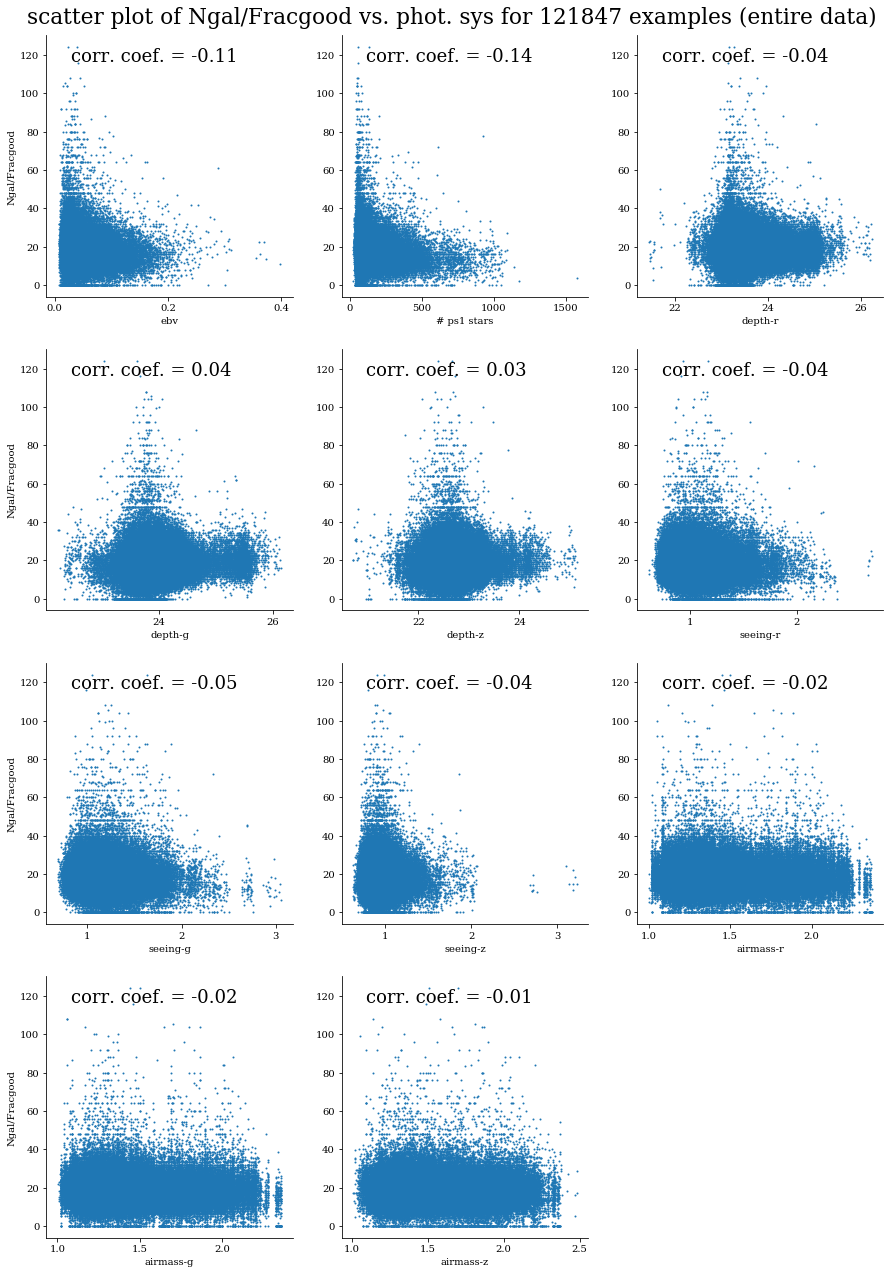

In [21]:
f,a = plt.subplots(ncols=3, nrows=4, figsize=(15, 20))
a = a.flatten()
f.delaxes(a[-1])
plt.rc('axes.spines', right=False, top=False)
plt.rc('font', size=18)
# plt.rcParams['axes.facecolor'] = 'white'
plt.subplots_adjust(top=0.96)
plt.suptitle("scatter plot of Ngal/Fracgood vs. phot. sys for {} examples (entire data)".format(outdata_m.size))
for s in range(outdata_m['features'].shape[1]):
    l = outdata_m['label']
    f = outdata_m['features'][:,s]
    cf = stats.pearsonr(f, l)[0]
    print(labels[s], "corr. coef. = %.3f"%cf)
    a[s].scatter(f, l, 1.0)
    a[s].set_xlabel(labels[s])
    a[s].text(0.1, 0.9, "corr. coef. = {:.2f}".format(cf), transform=a[s].transAxes)
    if s in [0, 3, 6, 9]:a[s].set_ylabel("Ngal/Fracgood") # {'r':21.4, 'z':20.5, 'g':22.0}

In [15]:
ft.write('/global/cscratch1/sd/mehdi/dr5_anand/eboss/ebossELGngal-features-masked.fits',
         outdata_m, header=dict(features='ebv, nstar, depth, seeing, airmass rgz',
                               fracgood='fracgood',
                               hpix='hpix with nside 256',
                               label='ELG_ngal/fracgood'))

In [6]:
path3 = '/global/cscratch1/sd/mehdi/dr5_anand/eboss/'
outdata_m, h = ft.read(path3 + "ebossELGngal-features-masked.fits", header=True)

In [9]:
# save fracgood as ranmap 
ranmap = np.zeros(12*256**2)
ranmap[outdata_m['hpix']] = outdata_m['fracgood']
hp.write_map('/global/cscratch1/sd/mehdi/dr5_anand/eboss/eBOSS.ELGRANhpmap.fits', ranmap, 
             fits_IDL=False, extra_header=['fracgood'])

In [13]:
np.isnan(outdata_m['features']).sum()

0

In [14]:
from sklearn.model_selection import KFold

In [16]:
def split2kfolds(data, k=4, shuffle=True):
    kfold = KFold(k, shuffle=shuffle)
    index = np.arange(data.size)
    kfold_data = {'test':{}, 'train':{}}
    for i, (trainID, testID) in enumerate(kfold.split(index)):
        foldname = 'fold'+str(i)
        kfold_data['test'][foldname] = data[testID]
        kfold_data['train'][foldname] = data[trainID]
    return kfold_data

In [22]:
data4fold = split2kfolds(outdata_m, k=4)

In [23]:
#mkdir /global/cscratch1/sd/mehdi/dr5_anand/march22/dr5_4fold/
#np.save('/global/cscratch1/sd/mehdi/dr5_anand/march22/dr5_4fold/test_train_eboss_dr5', data4fold)
np.save('/global/cscratch1/sd/mehdi/dr5_anand/march22/dr5_4fold/test_train_eboss_dr5-masked', data4fold)

In [24]:
#data_dr5_eboss = np.load('/global/cscratch1/sd/mehdi/dr5_anand/march22/dr5_4fold/test_train_eboss_dr5.npy').item()
data_dr5_eboss = np.load('/global/cscratch1/sd/mehdi/dr5_anand/march22/dr5_4fold/test_train_eboss_dr5-masked.npy').item()

In [25]:
# eBOSS ELG
for ff in range(4):
    f = 'fold'+str(ff)
    print(f, data_dr5_eboss['test'][f].size, data_dr5_eboss['train'][f].size)

fold0 30462 91385
fold1 30462 91385
fold2 30462 91385
fold3 30461 91386


In [117]:
# DESI ELG
dataold = np.load('/global/cscratch1/sd/mehdi/dr5_anand/dr54fold/test_train_dr5_4fold.npy').item()
for ff in range(4):
    f = 'fold'+str(ff)
    print(f, dataold['test'][f].size, dataold['train'][f].size)

fold0 11409 34226
fold1 11409 34226
fold2 11409 34226
fold3 11408 34227


In [120]:
30747 + 92242

122989

In [22]:
import pandas as pd

In [23]:
import seaborn as sns

In [29]:
matdata = outdata_m['features']#np.column_stack([outdata_m['label'], outdata_m['features']])

In [30]:
mat = np.array(matdata).byteswap().newbyteorder()

In [36]:
mat = np.column_stack([mat, outdata_m['label'].byteswap().newbyteorder()])

In [144]:
d = pd.DataFrame(data=mat
                 , columns=labels+['ngal'])

In [145]:
corr = d.corr()

In [146]:
corr

,ebv,nstar,depth-r,depth-g,depth-z,seeing-r,seeing-g,seeing-z,airmass-r,airmass-g,airmass-z,ngal
ebv,1.000000,0.518746,-0.086562,-0.172856,-0.104292,0.201724,0.169798,0.151690,-0.093593,-0.087333,-0.090443,-0.111928
nstar,0.518746,1.000000,-0.054309,-0.190178,-0.163116,0.226951,0.198883,0.278850,0.016165,0.010387,0.052467,-0.142160
depth-r,-0.086562,-0.054309,1.000000,0.548928,0.301627,-0.470231,-0.326798,-0.216078,-0.390725,-0.427899,-0.393426,-0.037982
depth-g,-0.172856,-0.190178,0.548928,1.000000,0.424759,-0.376879,-0.456229,-0.277545,-0.356654,-0.304710,-0.308128,0.042138
depth-z,-0.104292,-0.163116,0.301627,0.424759,1.000000,-0.250354,-0.243973,-0.484341,-0.332453,-0.319341,-0.361597,0.027320
seeing-r,0.201724,0.226951,-0.470231,-0.376879,-0.250354,1.000000,0.671314,0.288946,0.463411,0.467709,0.383343,-0.036046
seeing-g,0.169798,0.198883,-0.326798,-0.456229,-0.243973,0.671314,1.000000,0.248475,0.474462,0.482251,0.363363,-0.045305
seeing-z,0.151690,0.278850,-0.216078,-0.277545,-0.484341,0.288946,0.248475,1.000000,0.313549,0.305004,0.398942,-0.037077
airmass-r,-0.093593,0.016165,-0.390725,-0.356654,-0.332453,0.463411,0.474462,0.313549,1.000000,0.931176,0.762005,-0.020441
airmass-g,-0.087333,0.010387,-0.427899,-0.304710,-0.319341,0.467709,0.482251,0.305004,0.931176,1.000000,0.773692,-0.017859


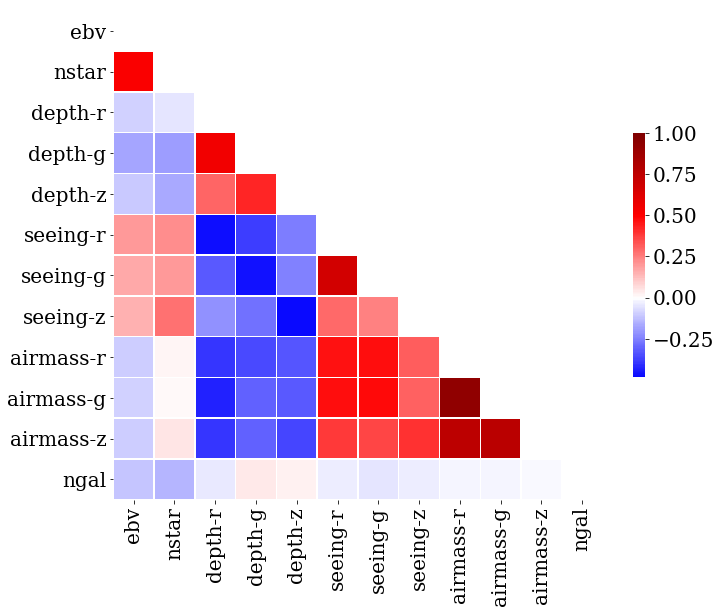

In [147]:
plt.rc('font', size=20)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
#plt.title('Correlation Matrix of DR5')
# Generate a custom diverging colormap
kw = dict(mask=mask, cmap=plt.cm.seismic, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, **kw)
plt.savefig('figs/features-dr5.pdf', bbox_inches='tight')

In [1]:
# let's go and run the NN
%ls /global/cscratch1/sd/mehdi/dr5_anand/eboss/

clustering/              ebossELGngal-features-masked.fits
dr5hpmask256.fits        ebossELGngal-features.fits
eBOSS.ELG.dr5.fits       regression/
eBOSS.ELGRANhpmap.fits   sysmaps256/
eBOSS.ELGhpmap.fits      test_train_eboss_dr5-masked.npy
eBOSS.ELGhpmap1024.fits


In [1]:
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fileslin = glob('/global/cscratch1/sd/mehdi/dr5_anand/eboss/regression/fold*/*units00*')
fileslin.sort()

In [3]:
files = glob('/global/cscratch1/sd/mehdi/dr5_anand/eboss/regression/fold*/*units1010*')
files.sort()

In [4]:
files, fileslin

(['/global/cscratch1/sd/mehdi/dr5_anand/eboss/regression/fold0/reg-nepoch1000-nchain10-batchsize8000units1010-Lrate0.01.npz',
  '/global/cscratch1/sd/mehdi/dr5_anand/eboss/regression/fold1/reg-nepoch1000-nchain10-batchsize8000units1010-Lrate0.01.npz',
  '/global/cscratch1/sd/mehdi/dr5_anand/eboss/regression/fold2/reg-nepoch1000-nchain10-batchsize8000units1010-Lrate0.01.npz',
  '/global/cscratch1/sd/mehdi/dr5_anand/eboss/regression/fold3/reg-nepoch1000-nchain10-batchsize8000units1010-Lrate0.01.npz'],
 ['/global/cscratch1/sd/mehdi/dr5_anand/eboss/regression/fold0/reg-nepoch500-nchain10-batchsize8000units00-Lrate0.01.npz',
  '/global/cscratch1/sd/mehdi/dr5_anand/eboss/regression/fold1/reg-nepoch500-nchain10-batchsize8000units00-Lrate0.01.npz',
  '/global/cscratch1/sd/mehdi/dr5_anand/eboss/regression/fold2/reg-nepoch500-nchain10-batchsize8000units00-Lrate0.01.npz',
  '/global/cscratch1/sd/mehdi/dr5_anand/eboss/regression/fold3/reg-nepoch500-nchain10-batchsize8000units00-Lrate0.01.npz'])

No handles with labels found to put in legend.


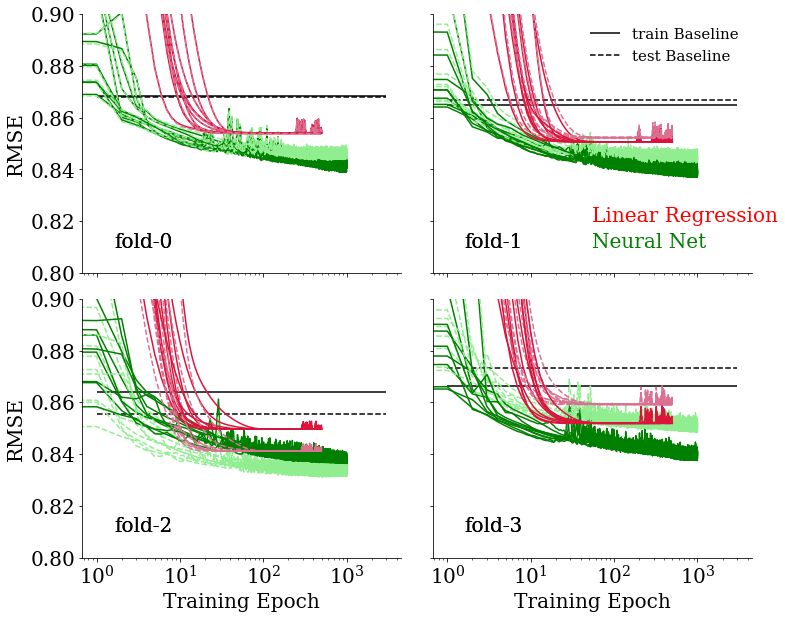

In [8]:
plt.rc('font', size=20, family='Serif')
plt.rc('axes.spines', right=False, top=False)
f, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,10),
                     sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
ax = ax.flatten()

# def add_mse(ax, files, testtrainlab=False, c=['green', 'lightgreen']):    
#     for j,file_i in enumerate(files):
#         d = np.load(file_i)
#         out = d['arr_0'].item()
#         for i,mse in enumerate(out['epoch_MSEs']):
#             if i == 0 and testtrainlab:
#                 ax[j].hlines(xmin=1,xmax=3000,y=out['options']['baselineMSE'][0],
#                              linestyles='-', label='train Baseline', alpha=1., color='k')
#                 ax[j].hlines(xmin=1,xmax=3000,y=out['options']['baselineMSE'][1],
#                              linestyles='--', label='test Baseline', alpha=1., color='k')

#             ax[j].plot(mse[-1][:,0], mse[-1][:,1],ls='-',c=c[0], alpha=0.5)
#             ax[j].plot(mse[-1][:,0], mse[-1][:,2],ls='--',c=c[1], alpha=0.6)
#         ax[j].set_xscale('log')
#         ax[j].text(0.1, 0.1, "fold-"+str(j), transform=ax[j].transAxes)
#         if j==1:ax[j].legend(frameon=False, 
#                              loc='upper right',
#                              fontsize=15)
#         ax[j].set_ylim(0.65,0.8)
# #         ax[j].set_yscale('log')
#     #     ax[j].text(100, 1.02*rmse[2], "Baseline RMSE", color="k")
#         if j in [0, 2]:ax[j].set_ylabel('MSE')
#         if j in [2, 3]:ax[j].set_xlabel('Training Epoch')
#         ax[j].set_xlim(1, 1000)
        
# add_mse(ax, files, c=['green', 'lightgreen'])
# add_mse(ax, fileslin, testtrainlab=True, c=['red','violet'])
# ax[1].text(0.5, 0.1, 'Neural Net ', color='g', transform=ax[1].transAxes)
# ax[1].text(0.5, 0.2, 'Linear Regression', color='r', transform=ax[1].transAxes)
# #plt.savefig('./figs/mse-dr5.pdf', bbox_inches='tight')


def add_mse(ax, files, testtrainlab=False, c=['green', 'lightgreen']):    
    for j,file_i in enumerate(files):
        d = np.load(file_i)
        out = d['arr_0'].item()
        for i,mse in enumerate(out['epoch_MSEs']):
            if i == 0 and testtrainlab:
                ax[j].hlines(xmin=1,xmax=3000,y=np.sqrt(out['options']['baselineMSE'][0]),
                             linestyles='-', label='train Baseline', alpha=1., color='k')
                ax[j].hlines(xmin=1,xmax=3000,y=np.sqrt(out['options']['baselineMSE'][1]),
                             linestyles='--', label='test Baseline', alpha=1., color='k')

            ax[j].plot(mse[-1][:,0], np.sqrt(mse[-1][:,1]),ls='-',c=c[0], alpha=1.0)
            ax[j].plot(mse[-1][:,0], np.sqrt(mse[-1][:,2]),ls='--',c=c[1], alpha=1.0)
        ax[j].set_xscale('log')
        ax[j].text(0.1, 0.1, "fold-"+str(j), transform=ax[j].transAxes)
        if j==1:ax[j].legend(frameon=False, 
                             loc='upper right',
                             fontsize=15)
        ax[j].set_ylim(0.8,.9)
#         ax[j].set_yscale('log')
    #     ax[j].text(100, 1.02*rmse[2], "Baseline RMSE", color="k")
        if j in [0, 2]:ax[j].set_ylabel('RMSE')
        if j in [2, 3]:ax[j].set_xlabel('Training Epoch')
        #ax[j].set_xlim(1, 1000)
        
add_mse(ax, files, c=['green', 'lightgreen'])
add_mse(ax, fileslin, testtrainlab=True, c=['crimson','palevioletred'])
ax[1].text(0.5, 0.1, 'Neural Net ', color='g', transform=ax[1].transAxes)
ax[1].text(0.5, 0.2, 'Linear Regression', color='r', transform=ax[1].transAxes)
plt.savefig('./figs/rmse-dr5.pdf', bbox_inches='tight')

In [5]:
def get_ypred(files):
    """
        Reading the Ngal and systematic
    """
    p_true = []
    x_true = []
    y_true = []
    y_pred = []
    y_base = []
    weights = []
    for j,file_i in enumerate(files):
        d = np.load(file_i)
        #linear
        out = d['arr_0'].item()
        p_true.append(out['test'][0])
        x_true.append(out['test'][1])
        y_true.append(out['test'][2].squeeze())
        weights.append(out['test'][3].squeeze())
        y_avg = []
        for i in range(len(out['chain_y'])):
            y_avg.append(out['chain_y'][i][1].squeeze().tolist())    
        meanY, stdY = out['options']['stats']['ystat']
        print(np.mean(out['train'][2]))
        print(meanY, stdY)
        y_base.append(np.ones(out['test'][2].shape[0])*meanY)        
        y_pred.append(stdY*np.mean(np.array(y_avg), axis=0) + meanY)
    
    Weights = np.concatenate(weights)
    Ptrue = np.concatenate(p_true)
    Xtrue = np.concatenate(x_true)
    Ytrue = np.concatenate(y_true)
    Ypred = np.concatenate(y_pred)
    Ybase = np.concatenate(y_base)
    print(Xtrue.shape, Ytrue.shape, Ypred.shape, Ybase.shape, Weights.shape)
    return Ptrue, Xtrue, Ytrue, Ypred, Ybase, Weights

Ptrue, Xtrue, Ytrue, Yprednn, Ybase, W = get_ypred(files)
Ptruel, Xtruel, Ytruel, Ypredlin, Ybasel, Wl = get_ypred(fileslin)

18.5170004341
[ 18.51700043] [ 6.95474336]
18.5229711092
[ 18.52297111] [ 6.97954272]
18.5379886531
[ 18.53798865] [ 7.00831004]
18.4920536545
[ 18.49205365] [ 6.95701535]
(121847, 11) (121847,) (121847,) (121847,) (121847,)
18.5170004341
[ 18.51700043] [ 6.95474336]
18.5229711092
[ 18.52297111] [ 6.97954272]
18.5379886531
[ 18.53798865] [ 7.00831004]
18.4920536545
[ 18.49205365] [ 6.95701535]
(121847, 11) (121847,) (121847,) (121847,) (121847,)


In [6]:
np.array_equal(Xtrue, Xtruel), np.array_equal(Ytrue, Ytruel), np.array_equal(W, Wl)

(True, True, True)

In [8]:
for (n,models) in zip(['base', 'NN', 'Lin'], [Ybase, Yprednn, Ypredlin]):
    print(n, '%.2f %.2f'%(np.sqrt(np.mean(W * (models - Ytrue)**2)), np.mean(np.abs(W * (models - Ytrue)))))

base 6.04 4.39
NN 5.84 4.22
Lin 5.94 4.29


In [9]:
Ytrue.shape, np.mean(Ytrue), np.std(Ytrue)

((121847,), 18.517503393122819, 6.9749558900190234)

In [33]:
bands = ['r','g','z']
labels = ['ebv','nstar']
labels += ['depth-'+b for b in bands]
labels += ['seeing-'+b for b in bands]
labels += ['airmass-'+b for b in bands]

/global/homes/m/mehdi/cori-envs/py3p6/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in true_divide


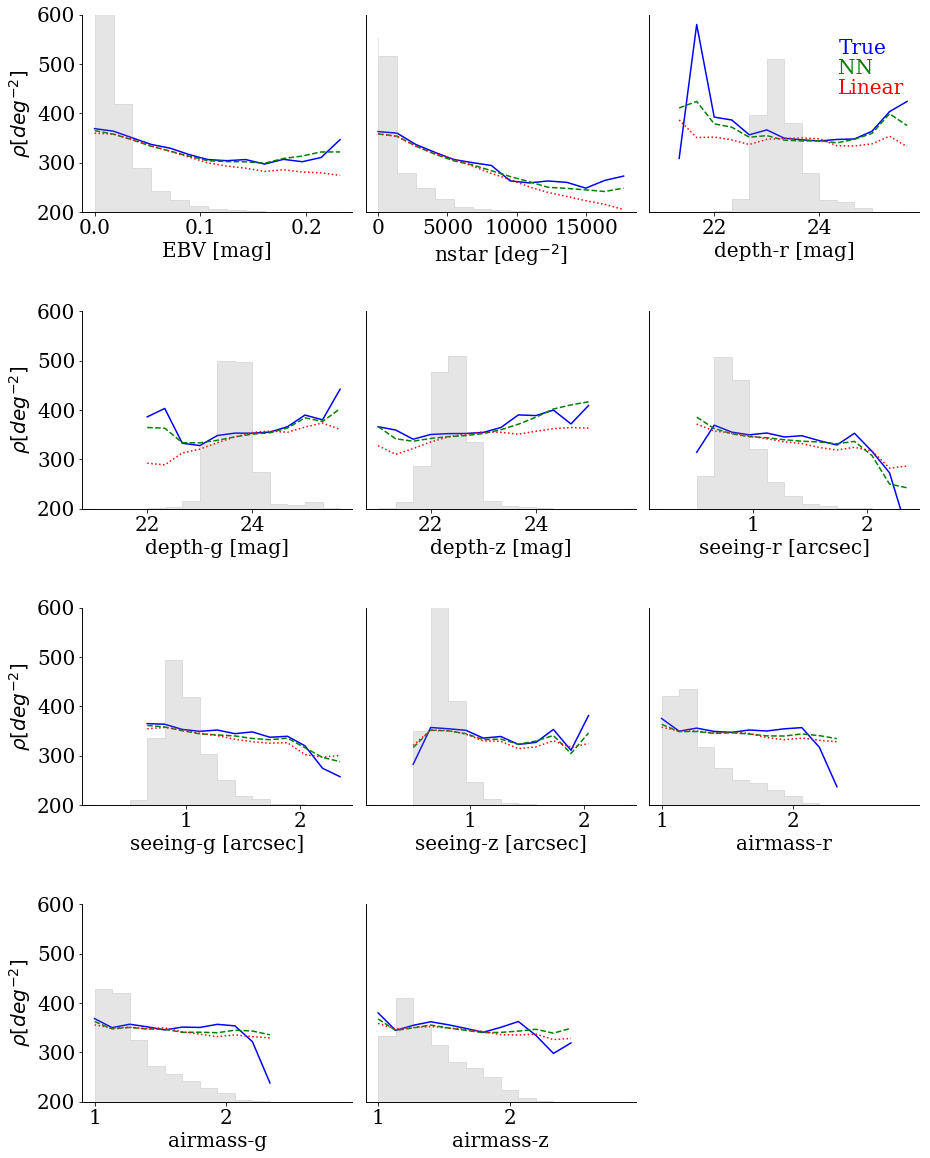

In [37]:
import healpy as hp
nside2pixarea =lambda nside: 4.*np.pi / (12*nside*nside) * 3282.80635
def get_nsys(sys, ngal, bins):
    npix,_ = np.histogram(sys, bins=bins)
    ngalp,_ = np.histogram(sys, bins=bins, weights=ngal)
    area = nside2pixarea(nside=256)
    avg  = np.sum(ngalp)/np.sum(npix)/area
    return bins[:-1], ngalp/npix/area, area*npix

def plot_ith(ax1, xlabel='EBV', index=0, bins=np.linspace(0.001, 0.2, 20), fc=1):
    xl=[]
    y1l =[]
    y2l = []
    for x,y in [(Xtrue[:,index], Ytrue),(Xtrue[:,index], Yprednn), (Xtrue[:,index], Ypredlin)]:
        x, y, a = get_nsys(x, y, bins)
        xl.append(fc*x)
        y1l.append(y)
        y2l.append(a)
        
    ax2 = ax1.twinx()
    lt = ['-','--', ':']
    c  = ['blue', 'green', 'red']
    ax2.fill_between(xl[0], y2l[0], color='grey', alpha=0.2, step='pre')
    for i, label_i in enumerate(['True', 'NN', 'Linear']):
        ax1.plot(xl[i], y1l[i], ls=lt[i], color=c[i], label=label_i)
        if index==2:ax1.text(0.7, 0.8-i*0.1, label_i, color=c[i], transform=ax1.transAxes)

#     if index==2:
#         ax2.text(0.15, 0.1, r'Total area = {:.1f} deg$^{}$'.format(np.sum(y2l[0]),2),
#              transform=ax2.transAxes, fontsize=20, color='dimgrey')
    ax2.set_yticks([])
    ax1.set_xlabel(xlabel)
    ax1.set_ylim(200, 600)
    ax2.set_ylim(0, 3000)
    
#f, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 10), sharey=True)
#ax = ax.flatten()

# ax[1].text(0.2, 0.95, 'DESI ELG DECaLS DR5', transform=ax[1].transAxes)
# plot_ith(ax[0], index=0, xlabel='EBV', bins=np.linspace(1e-4, 0.2,15))
# plot_ith(ax[1], index=1, xlabel='Nstar', bins=np.linspace(0.5, 500, 15))
# plot_ith(ax[2], index=3, xlabel='depth-g', bins=np.linspace(23.8, 26, 15))
# plot_ith(ax[3], index=6, xlabel='seeing-g', bins=np.linspace(0.5, 2.3, 15))
# for i in [0, 2]:ax[i].set_ylabel(r'$\rho [deg^{-2}]$')
plt.rc('axes.spines', left=True)
f,ax = plt.subplots(ncols=3, nrows=4, figsize=(15, 20))
plt.subplots_adjust(wspace=0.05, hspace=0.5)
ax = ax.flatten()
f.delaxes(ax[-1])
#ax[2].text(0.3, 0.95, 'eBOSS ELG DECaLS DR5', transform=ax[2].transAxes)
plot_ith(ax[0], index=0, xlabel='EBV [mag]', bins=np.linspace(1e-4, 0.25,15))
plot_ith(ax[1], index=1, xlabel='nstar [deg$^{-2}$]', bins=np.linspace(0.5, 1000, 15), fc=1./hp.nside2pixarea(256, degrees=True))
for i in range(2, 5):
    plot_ith(ax[i], index=i, xlabel=labels[i]+' [mag]', bins=np.linspace(21, 26, 16))
for i in range(5, 8):
    plot_ith(ax[i], index=i, xlabel=labels[i]+' [arcsec]', bins=np.linspace(0.2, 2.5, 16))
for i in range(8, 11):
    plot_ith(ax[i], index=i, xlabel=labels[i], bins=np.linspace(1.0, 3., 16))

for i in [0, 3, 6, 9]:ax[i].set_ylabel(r'$\rho [deg^{-2}]$')
for i in [1,2,4,5,7,8,10]:ax[i].set_yticks([])
plt.savefig('./figs/rho-dr5.pdf', bbox_inches='tight')

In [22]:
nnpred = np.zeros(Yprednn.size, dtype=[('hpix','i8'), ('weight','f8')])
nnpred['hpix']   = Ptrue
nnpred['weight'] = Yprednn

In [23]:
linpred = np.zeros(Ypredlin.size, dtype=[('hpix','i8'), ('weight','f8')])
linpred['hpix']   = Ptrue
linpred['weight'] = Ypredlin

In [24]:
print(linpred['weight'].min(), nnpred['weight'].min(),\
      linpred['weight'].max(), nnpred['weight'].max())

5.97156357258 9.90057998113 21.5344750796 25.772324584


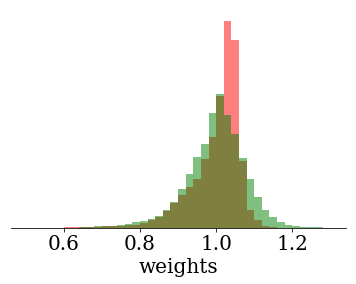

In [25]:
plt.rc('axes.spines', left=False)
plt.yticks([])
plt.hist(linpred['weight']/np.mean(linpred['weight']), bins=40, color='r', 
         range=(0.5,1.3), normed=True, alpha=0.5)
plt.hist(nnpred['weight']/np.mean(nnpred['weight']), bins=40, color='g',
         alpha=0.5, range=(0.5,1.3), normed=True)
_=plt.xlabel('weights')

In [26]:
ls /global/cscratch1/sd/mehdi/dr5_anand/eboss/regression/

fold0/  fold1/  fold2/  fold3/


In [28]:
import fitsio as ft

In [29]:
ft.write('/global/cscratch1/sd/mehdi/dr5_anand/eboss/regression/lin-weights-nside256.fits', linpred,
        header={'weight':'Lin weights', 'hpix':'healpix indices for nside 256'})

In [40]:
ls /global/cscratch1/sd/mehdi/dr5_anand/eboss/

clustering/              ebossELGngal-features-masked.fits
dr5hpmask256.fits        ebossELGngal-features.fits
eBOSS.ELG.dr5.fits       regression/
eBOSS.ELGRANhpmap.fits   sysmaps256/
eBOSS.ELGhpmap.fits      test_train_eboss_dr5-masked.npy
eBOSS.ELGhpmap1024.fits


In [31]:
ft.write('/global/cscratch1/sd/mehdi/dr5_anand/eboss/regression/nn-weights-nside256.fits', nnpred,
        header={'weight':'NN weights', 'hpix':'healpix indices for nside 256'})

In [61]:
def makehp(name):
    d = ft.read(name)
    hpmap = np.zeros(12*256*256)
    hpmap[d['hpix']] = d['weight']
    return hpmap

#
nnwmap = makehp('/global/cscratch1/sd/mehdi/dr5_anand/eboss/regression/nn-weights-nside256.fits')
liwmap = makehp('/global/cscratch1/sd/mehdi/dr5_anand/eboss/regression/lin-weights-nside256.fits')

#
hp.write_map('/global/cscratch1/sd/mehdi/dr5_anand/eboss/regression/nn-weights-hpmap256.fits', nnwmap, fits_IDL=False)
hp.write_map('/global/cscratch1/sd/mehdi/dr5_anand/eboss/regression/lin-weights-hpmap256.fits', liwmap, fits_IDL=False)

In [62]:
nnpred['weight'].min()

9.9005799811339532

In [41]:
import sys
sys.path.append('/global/homes/m/mehdi/github/DESILSS')
from syslss import ngalsys

In [42]:
import healpy as hp

In [43]:
path3 = '/global/cscratch1/sd/mehdi/dr5_anand/eboss/'
outdata_m, h = ft.read(path3 + "ebossELGngal-features-masked.fits", header=True)

In [44]:
npix = 12*256**2
mask = np.zeros(npix)
mask[nnpred['hpix']] = 1.0


ranmap2 = np.zeros(npix)
ranmap2[nnpred['hpix']] = nnpred['weight']

#
ranmap3 = np.zeros(npix)
ranmap3[nnpred['hpix']] = Ypredlin

#mask[ranmap2 < 0.0] = 0.0  # to remove negative weights
galmap  = np.zeros(npix)
galmap[outdata_m['hpix']] = outdata_m['label']

ranmap1  = np.zeros(npix)
ranmap1[outdata_m['hpix']] = outdata_m['fracgood']

In [45]:
class systematic(object):
    def __init__(self, sysname, mask):
        df = sysname #ft.read(sysname, lower=True)
        self.HPIX = np.argwhere(~np.logical_not(mask)).flatten()
        self.SIGNAL = df[~np.logical_not(mask)]

In [46]:
allchunks = dict()
# def bins(i, minx, maxx, nbin):
#     if i <
bins = {0:np.linspace(1e-4, 0.25,15),
        1:np.linspace(0.5, 1000, 15),
        2:np.linspace(21, 26, 16), # x3
        3:np.linspace(0.5, 2.5, 16), # x3
        4:np.linspace(1.2, 3., 16)   # x3     
       }
for i in range(Xtrue.shape[1]):
    #print(i)
    sysi  = np.zeros(npix)
    sysi[Ptrue]  = Xtrue[:,i]  # nstar
    sysi256 = systematic(sysi, mask)
    if i in [0, 1]:
        sysibin = bins[i]
    elif i in [2,3,4]:
        sysibin = bins[2]
    elif i in [5, 6, 7]:
        sysibin = bins[3]
    elif i in [8, 9, 10]:
        sysibin = bins[4]
    #print(sysibin.min(), sysibin.max())
    #
    eboss = ngalsys(galmap, 256,hpmap=True)
    eboss.prepare_inputs(sysi256, selection_function=mask, fracdet_c=-1, mask=mask.astype(np.bool))
    eboss.digitize_ngalsys(sysibin)
    eboss.processjack(njack=10)
    #
    ebossai = ngalsys(galmap, 256,hpmap=True)
    ebossai.prepare_inputs(sysi256, selection_function=mask*ranmap2, fracdet_c=-1, mask=mask.astype(np.bool))
    ebossai.digitize_ngalsys(sysibin)
    ebossai.processjack(njack=10)
    #
    ebossl = ngalsys(galmap, 256,hpmap=True)
    ebossl.prepare_inputs(sysi256, selection_function=mask*ranmap3, fracdet_c=-1, mask=mask.astype(np.bool))
    ebossl.digitize_ngalsys(sysibin)
    ebossl.processjack(njack=10)
    
    allchunks[i] = dict(uni = eboss.output, ai=ebossai.output, li=ebossl.output)

In [49]:
ls /global/cscratch1/sd/mehdi/dr5_anand/eboss/regression/

fold0/  fold2/  lin-weights-nside256.fits
fold1/  fold3/  nn-weights-nside256.fits


In [50]:
np.save('/global/cscratch1/sd/mehdi/dr5_anand/eboss/regression/nnbar_all', allchunks)

In [51]:
import numpy as np
import healpy as hp

In [52]:
allchunks = np.load('/global/cscratch1/sd/mehdi/dr5_anand/eboss/regression/nnbar_all.npy').item()

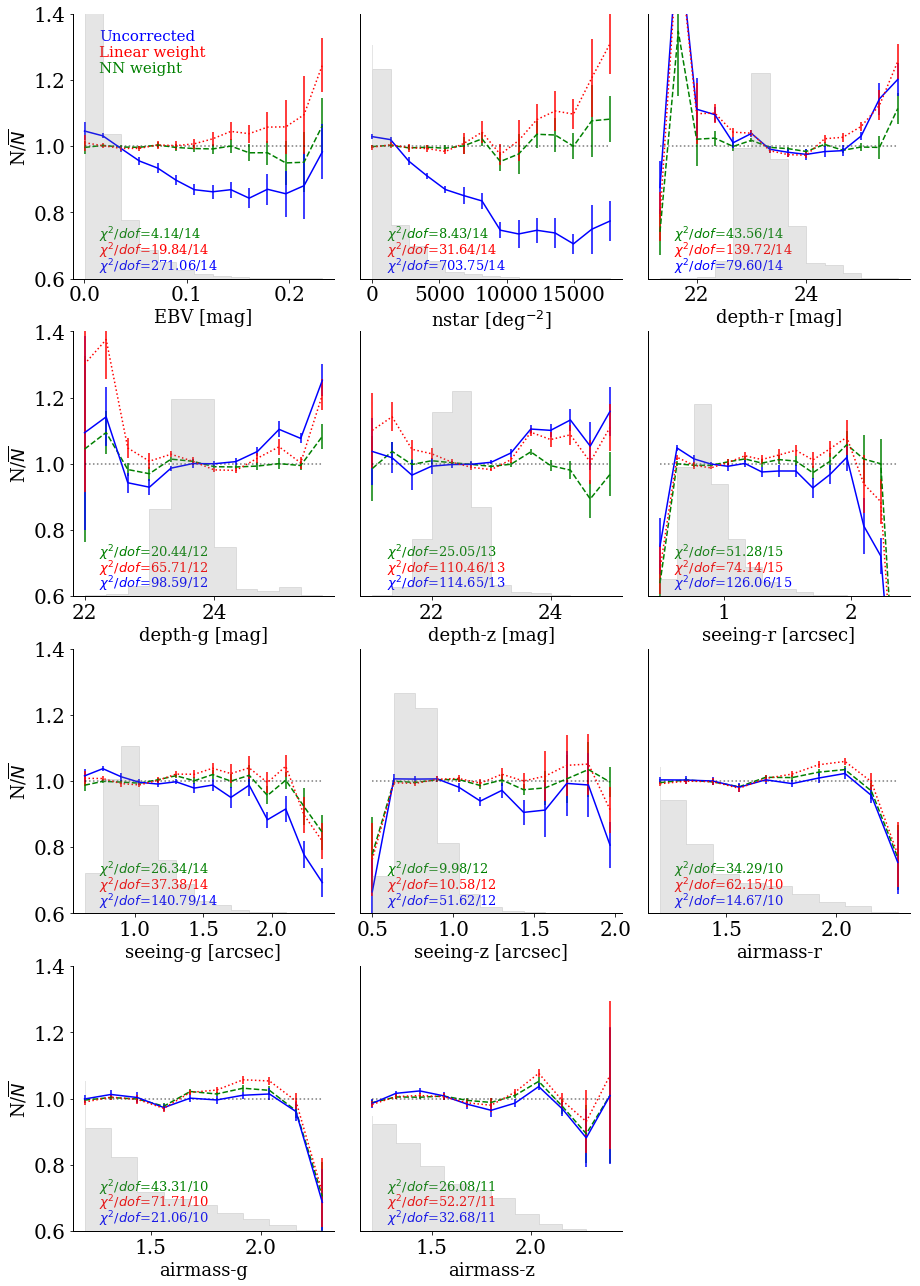

In [66]:
bands = ['r','g','z']
labels = ['EBV','nstar']
labels += ['depth-'+b for b in bands]
labels += ['seeing-'+b for b in bands]
labels += ['airmass-'+b for b in bands]
plt.rc('axes.spines', top=False, right=False, left=True)


f,a = plt.subplots(ncols=3, nrows=4, figsize=(15, 20))
a = a.flatten()
f.delaxes(a[-1])
# plt.suptitle("eBOSS ELG DECaLS DR5", fontsize=18)
plt.subplots_adjust(wspace=0.1, hspace=0.2, top=0.97)


def helper(name):
    x = name['bin_edges'][:-1]
    y = name['delta']
    ye = name['delta_err']
    s = name['area']
    mask = (y != 0.0 ) & ~np.isnan(y) & (ye !=0.0) & (~np.isnan(ye))
    x = x[mask]
    y = y[mask]
    ye = ye[mask]
    s  = s[mask]
    return x, y, ye, s

rss = lambda y, ye: np.sum(((y-1.0)/ye)**2)

def add_plot(ax, n, t, i, text=True, fc=1, **kwargs):
    a2 = ax.twinx()
    x,y,ye,s = helper(n)
    x *= fc
    ax.errorbar(x, y, yerr=ye,**kwargs)
    kwargs.pop('linestyle')
    ax.text(0.1, 0.03+0.06*i, r'$\chi^{}/dof$={:.2f}/{}'.format(2, rss(y, ye),y.size),
           transform=ax.transAxes, **kwargs, fontsize=13)
    kwargs.pop('color')
    if i==0:
        a2.fill_between(x, s, step='pre', alpha=0.2, color='grey',**kwargs)
        a2.set_ylim(0,3000)
    ax.set_ylim(0.6, 1.4)
    ax.plot([x.min(), x.max()], [1, 1], 'k:', alpha=0.2)
    return a2


for j,i in enumerate(range(len(allchunks))):
    #print(j,i)
    if i in [0, 2, 3, 4]:
        l=' [mag]'
        fc = 1
    elif i in [1]:
        l = ' [deg$^{-2}$]'
        fc = 1./hp.nside2pixarea(256, degrees=True)
    elif i in [5, 6, 7]:
        l = ' [arcsec]'
        fc = 1
    else:
        l = ''
        fc = 1
    a2_0 = add_plot(a[j], allchunks[i]['ai'], labels[i], 2, color='g', linestyle='--', fc=fc)
    a2_1 = add_plot(a[j], allchunks[i]['uni'], labels[i],0, color='b', text=False, linestyle='-', fc=fc)
    a2_2 = add_plot(a[j], allchunks[i]['li'], labels[i],1, color='r', text=False, linestyle=':', fc=fc)
    if j in [0, 3, 6, 9, 12]:
        a[j].set_ylabel(r'N/$\overline{N}$', fontsize=18)
    else:
        a[j].set_yticks([])
#     if j in [2, 5, 8, 10]:
#         a2_1.set_ylabel(r'eff. area [deg$^{2}$]', fontsize=18)
#     else:
#         a2_1.set_yticks([])
#         a2_0.set_yticks([])
#         a2_2.set_yticks([])
    a2_1.set_yticks([])
    a2_0.set_yticks([])
    a2_2.set_yticks([])
    a[j].set_xlabel(labels[i]+l, fontsize=18)
#     a[j].set_xscale('log')
kw = dict(transform=a[0].transAxes, fontsize=15)
a[0].text(0.1, 0.9, 'Uncorrected', color='b', **kw)
a[0].text(0.1, 0.84, 'Linear weight', color='r', **kw)
a[0].text(0.1, 0.78, 'NN weight', color='g', **kw)
plt.savefig('figs/nnbar-dr5.pdf', bbox_inches='tight')


Anything after this is old

0 0
1 1
2 3


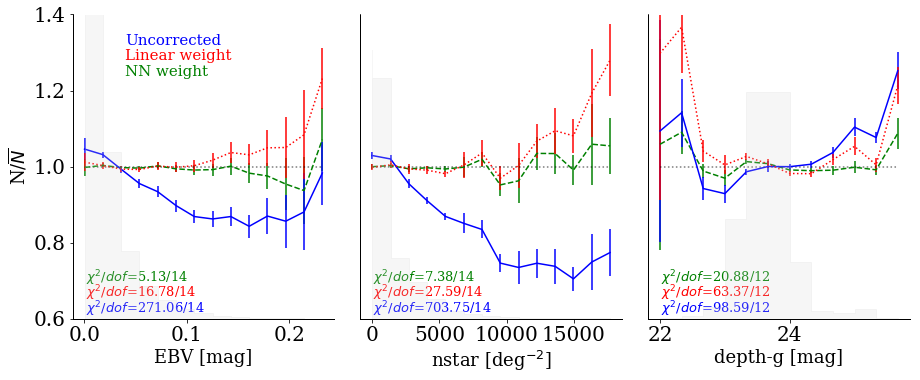

In [42]:
bands = ['r','g','z']
labels = ['EBV','nstar']
labels += ['depth-'+b for b in bands]
labels += ['seeing-'+b for b in bands]
labels += ['airmass-'+b for b in bands]
plt.rc('axes.spines', top=False, right=False, left=True)


f,a = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
a = a.flatten()
# f.delaxes(a[-1])
# plt.suptitle("eBOSS ELG DECaLS DR5", fontsize=18)
plt.subplots_adjust(wspace=0.1, hspace=0.2, top=0.97)


def helper(name):
    x = name['bin_edges'][:-1]
    y = name['delta']
    ye = name['delta_err']
    s = name['area']
    mask = (y != 0.0 ) & ~np.isnan(y) & (ye !=0.0) & (~np.isnan(ye))
    x = x[mask]
    y = y[mask]
    ye = ye[mask]
    s  = s[mask]
    return x, y, ye, s

chi2 = lambda y, ye: np.sum(((y-1.0)/ye)**2)

def add_plot(ax, n, t, i, text=True, fc=1, **kwargs):
    a2 = ax.twinx()
    x,y,ye,s = helper(n)
    x *= fc
    ax.errorbar(x, y, yerr=ye,**kwargs)
    kwargs.pop('linestyle')
    ax.text(0.05, 0.02+0.05*i, r'$\chi^{}/dof$={:.2f}/{}'.format(2, chi2(y, ye),y.size),
           transform=ax.transAxes, **kwargs, fontsize=13)
    kwargs.pop('color')
    if i==0:
        a2.fill_between(x, s, step='pre', alpha=0.2, color='lightgrey',**kwargs)
        a2.set_ylim(0,3000)
    ax.set_ylim(0.6, 1.4)
    ax.plot([x.min(), x.max()], [1, 1], 'k:', alpha=0.2)
    return a2


for j,i in enumerate([0,1,3]):
    print(j,i)
    if i in [0, 2, 3, 4]:
        l=' [mag]'
        fc = 1
    elif i in [1]:
        l = ' [deg$^{-2}$]'
        fc = 1./hp.nside2pixarea(256, degrees=True)
    elif i in [5, 6, 7]:
        l = ' [arcsec]'
        fc = 1
    else:
        l = ''
        fc = 1
    a2_0 = add_plot(a[j], allchunks[i]['ai'], labels[i], 2, color='g', linestyle='--', fc=fc)
    a2_1 = add_plot(a[j], allchunks[i]['uni'], labels[i],0, color='b', text=False, linestyle='-', fc=fc)
    a2_2 = add_plot(a[j], allchunks[i]['li'], labels[i],1, color='r', text=False, linestyle=':', fc=fc)
    if j in [0, 3, 6, 9, 12]:
        a[j].set_ylabel(r'N/$\overline{N}$', fontsize=18)
    else:
        a[j].set_yticks([])
#     if j in [2, 5, 8, 10]:
#         a2_1.set_ylabel(r'eff. area [deg$^{2}$]', fontsize=18)
#     else:
#         a2_1.set_yticks([])
#         a2_0.set_yticks([])
#         a2_2.set_yticks([])
    a2_1.set_yticks([])
    a2_0.set_yticks([])
    a2_2.set_yticks([])
    a[j].set_xlabel(labels[i]+l, fontsize=18)
#     a[j].set_xscale('log')
kw = dict(transform=a[0].transAxes, fontsize=15)
a[0].text(0.2, 0.9, 'Uncorrected', color='b', **kw)
a[0].text(0.2, 0.85, 'Linear weight', color='r', **kw)
a[0].text(0.2, 0.8, 'NN weight', color='g', **kw)
# plt.savefig('figs/nnbar-dr5.pdf', bbox_inches='tight')
plt.savefig('figs/nnbar-ebv-nstar-depthg.pdf', bbox_inches='tight')

In [6]:
# let's do some clustering measurements
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.append('/global/homes/m/mehdi/github/DESILSS')

In [7]:
import healpy as hp
import numpy as np
import fitsio as ft
import syslss as sl

In [8]:
# read elgmap and ranmap
elgmap = hp.read_map('/global/cscratch1/sd/mehdi/dr5_anand/eboss/eBOSS.ELGhpmap.fits')
ranmap = hp.read_map('/global/cscratch1/sd/mehdi/dr5_anand/eboss/eBOSS.ELGRANhpmap.fits')

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [11]:
# def makehp(name):
#     d = ft.read(name)
#     hpmap = np.zeros(12*256*256)
#     hpmap[d['hpix']] = d['weight']
#     return hpmap

In [5]:
# nnwmap = makehp('/global/cscratch1/sd/mehdi/dr5_anand/march22/nn-weights-nside256.fits')
# liwmap = makehp('/global/cscratch1/sd/mehdi/dr5_anand/march22/lin-weights-nside256.fits')

In [9]:
# hp.write_map('/global/cscratch1/sd/mehdi/dr5_anand/march22/nn-weights-hpmap256.fits', nnwmap, fits_IDL=False)
# hp.write_map('/global/cscratch1/sd/mehdi/dr5_anand/march22/lin-weights-hpmap256.fits', liwmap, fits_IDL=False)
nnwmap = hp.read_map('/global/cscratch1/sd/mehdi/dr5_anand/march22/nn-weights-hpmap256.fits')
liwmap = hp.read_map('/global/cscratch1/sd/mehdi/dr5_anand/march22/lin-weights-hpmap256.fits')

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [10]:
# find a common mask
mask1 = ranmap != 0.0
mask2 = liwmap != 0.0
mask3 = nnwmap !=0.0

In [11]:
np.array_equal(mask1, mask3), np.array_equal(mask2, mask3)

(True, True)

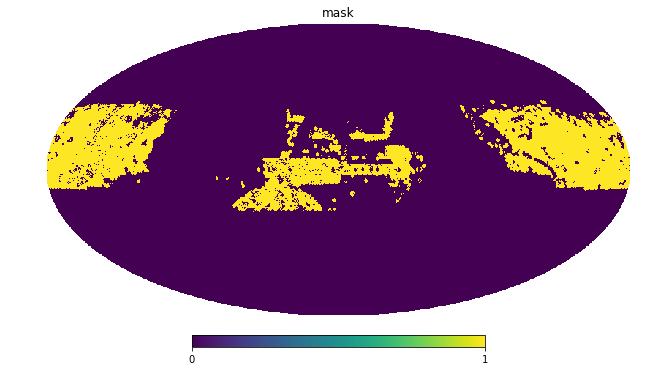

In [12]:
hp.mollview(mask1, title="mask")

In [21]:
results = []
for select_fun in [np.ones_like(ranmap), liwmap, nnwmap]:
    dr5 = sl.AngularClustering2D(elgmap, ranmap, selection_function=select_fun, hpmap=True, mask=mask1)
    results.append(dr5.run())

In [15]:
ls /global/cscratch1/sd/mehdi/dr5_anand/march22/

dr5_4fold/
lin-weights-hpmap256.fits
lin-weights-nside256.fits
nn-weights-hpmap256.fits
nn-weights-nside256.fits
w_buggy_airmass_seeing-lin-weights-nside256.fits
w_buggy_airmass_seeing-nn-weights-nside256.fits
xi-cl-dr5_lin.npy
xi-cl-dr5_nn.npy
xi-cl-dr5_uni.npy
xi-cl-uni-lin-nn.npy


In [11]:
np.save('/global/cscratch1/sd/mehdi/dr5_anand/march22/xi-cl-uni-lin-nn', results)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
results = np.load('/global/cscratch1/sd/mehdi/dr5_anand/march22/xi-cl-uni-lin-nn.npy')

In [3]:
from scipy import stats

In [6]:
stats.binned_statistic?

In [11]:
def binner(X, Y, Xbins, statmode='mean'):
    bin_stats,bin_edges,binnumber = stats.binned_statistic(X,Y,statistic=statmode,bins=Xbins,)
    bin_std,bin_edges,binnumber = stats.binned_statistic(X,Y,statistic=np.std,bins=Xbins)
    bin_count,bin_edges,binnumber = stats.binned_statistic(X,Y,statistic='count',bins=Xbins)
    errorbar = bin_std/np.sqrt(bin_count)
    errorbarm = np.array(errorbar)
    errorbarm[errorbar>=bin_stats] = bin_stats[errorbar>=bin_stats]*.9999999
    bin_center = 0.5*(bin_edges[1:]+bin_edges[:-1])
    return bin_center,bin_stats,[errorbarm,errorbar]

def binner2(l, cl, fsky, lbins):
    w = 2*l+1
    x  = []
    y  = []
    ye = []
    args = np.digitize(l, lbins)
    bl = args.min()
    bu = args.max()
    for i in range(1, bu):
        m   = args == i
        cm = np.sum( w[m]*cl[m]) / np.sum(w[m])
        y.append(cm)
        x.append(0.5*(lbins[i-1]+lbins[i]))
        ye.append(cm / np.sqrt(np.sum(w[m]) * 0.5 * fsky))
    
    clbins = np.array(y)
    error  = np.array(ye)
    errorm = np.copy(error)
    errorm[error >= clbins] = clbins[error >= clbins]*0.99999
    return np.array(x), clbins, [errorm, error]
    

def scatterit(ax, l, cl, bins, shift=0, **kwargs):
#     cly  = cl / np.sqrt((2*np.arange(cl.size)+1)*0.15/2)
#     ax.errorbar(l+shift, cl, yerr=cly, linestyle='None', **kwargs)
    lb, clb, yclb = binner2(l, cl, 0.15, bins)
    ax.errorbar(lb+shift, clb, yerr=yclb, linestyle='None', **kwargs)
#     ax.scatter(l, cl, **kwargs, alpha=0.2)

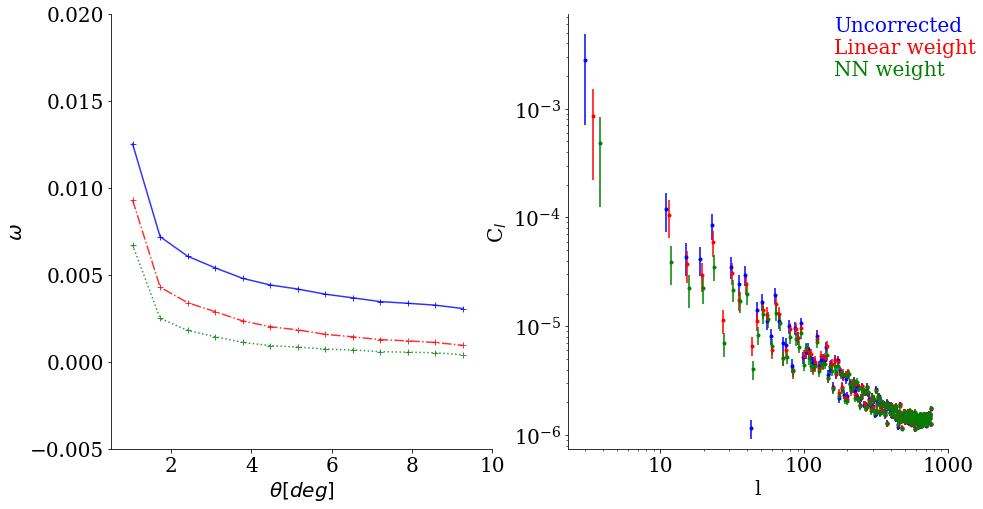

In [12]:
names = ['Uncorrected','Linear weight', 'NN weight']
c = ['blue', 'red', 'green']
ltl = ['-','-.',':']
plt.rc('font', family='serif', size=20)
plt.rc('axes.spines', right=False, top=False)
from matplotlib.ticker import FormatStrFormatter




f,a = plt.subplots(ncols=2, figsize=(15,8))
pl = ['uni','lin','nn']
#
#
for i, result_i in enumerate(results):
    tp, xip = np.load('/global/cscratch1/sd/mehdi/dr5_anand/march22/xi-cl-dr5_'+pl[i]+'.npy')
    t,xi = result_i['xi']
    l,cl = result_i['cl']
    a[0].plot(tp, xip, color=c[i], linestyle=ltl[i], marker='+', alpha=0.8)
#     a[0].plot(t, xi, color=c[i], linestyle=ltl[i], alpha=0.3)
    scatterit(a[1], l, cl,np.arange(1, 1000, 4),  shift=0.4*i, marker='.', color=c[i])
    a[1].text(0.7, 0.96-i*0.05, names[i], color=c[i], transform=a[1].transAxes)

# 0
# a[0].set_yscale('log')
# a[0].axis([.22,10, 1.e-5, 1.e-1])
# a[0].set_xscale('log')
a[0].axis([0.5, 10., -0.005, 0.02])
a[0].set_xlabel(r'$\theta[deg]$')
a[0].set_ylabel(r'$\omega$')
# f.delaxes(a[0])
# 1
a[1].loglog()
# a[1].axis([0.8, 1000, 1.e-6, 1.e-3])
a[1].set_xlabel('l')
a[1].set_ylabel(r'C$_{l}$')
a[1].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
# plt.savefig('./figs/xi-cl-dr5.pdf', bbox_inches='tight')

True


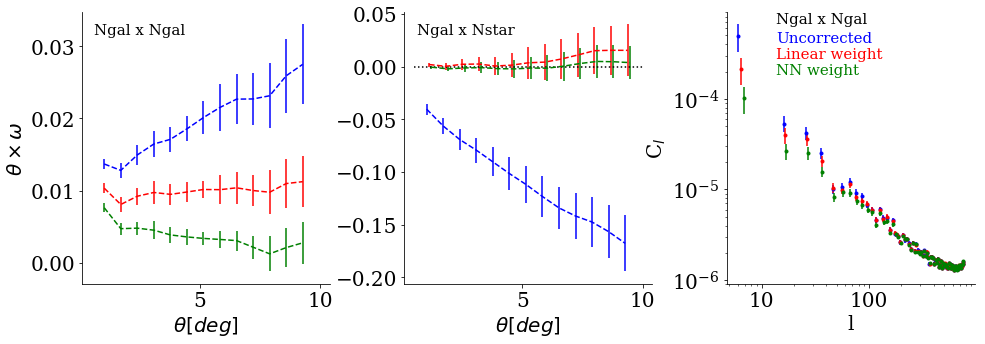

In [33]:
names = ['Uncorrected','Linear weight', 'NN weight']
c = ['blue', 'red', 'green']
ltl = ['-','-.',':']
plt.rc('font', family='serif', size=20)
plt.rc('axes.spines', right=False, top=False)
from matplotlib.ticker import FormatStrFormatter
import numpy as np
nn  = np.load('/global/cscratch1/sd/mehdi/dr5_anand/march22/xi-cl-dr5_nn-jack.npy').item()
uni = np.load('/global/cscratch1/sd/mehdi/dr5_anand/march22/xi-cl-dr5_uni-jack.npy').item()
lin = np.load('/global/cscratch1/sd/mehdi/dr5_anand/march22/xi-cl-dr5_lin-jack.npy').item()

nnc  = np.load('/global/cscratch1/sd/mehdi/dr5_anand/march22/xi-ngalnstar-dr5_nn-jack.npy').item()
unic = np.load('/global/cscratch1/sd/mehdi/dr5_anand/march22/xi-ngalnstar-dr5_uni-jack.npy').item()
linc = np.load('/global/cscratch1/sd/mehdi/dr5_anand/march22/xi-ngalnstar-dr5_lin-jack.npy').item()

f,a = plt.subplots(ncols=3, figsize=(16,5))
plt.subplots_adjust(wspace=0.3)
pl = ['uni','lin','nn']
#
#
for i, result_i in enumerate(results):
    #tp, xip = np.load('/global/cscratch1/sd/mehdi/dr5_anand/march22/xi-cl-dr5_'+pl[i]+'.npy')
    #t,xi = result_i['xi']
    l,cl = result_i['cl']
    #a[0].plot(tp, tp*xip, color=c[i], linestyle=ltl[i], marker='+', alpha=0.8)
    #a[0].plot(t, xi, color=c[i], linestyle=ltl[i], alpha=0.3)
    scatterit(a[2], l, cl,np.arange(1, 1000, 10),  shift=0.4*i, marker='.', color=c[i])
    a[2].text(0.2, 0.89-i*0.06, names[i], color=c[i], transform=a[2].transAxes, fontsize=15)
a[2].text(0.2, 0.96, 'Ngal x Ngal', transform=a[2].transAxes, fontsize=15)
# for i in range(20):
#     b = nn['t']
#     a[0].plot(nn['t'], b*nn['wjacks'][i], 'g', alpha=0.2)
#     a[0].plot(lin['t'], b*lin['wjacks'][i], 'r', alpha=0.2)
#     a[0].plot(uni['t'], b*uni['wjacks'][i], 'b', alpha=0.2)

print(np.array_equal(nn['t'], lin['t']))
b = nn['t']
a[0].errorbar(uni['t'], b*uni['w'], 
             yerr=b*uni['werr'], ls='--', color='b',
            label='Uncorrected')
a[0].errorbar(lin['t'], b*lin['w'],
             yerr=b*lin['werr'], ls='--', color='r',
            label='Linear weight')
a[0].errorbar(nn['t'], b*nn['w'], 
             yerr=b*nn['werr'], ls='--', color='g',
            label='NN weight')

a[1].errorbar(unic['t'], b*unic['w'], 
             yerr=b*unic['werr'], ls='--', color='b',
            label='Uncorrected')
a[1].errorbar(0.1+linc['t'], b*linc['w'],
             yerr=b*linc['werr'], ls='--', color='r',
            label='Linear weight')
a[1].errorbar(0.2+nnc['t'], b*nnc['w'], 
             yerr=b*nnc['werr'], ls='--', color='g',
            label='NN weight')
a[1].plot([0.5, 10], [0,0], 'k:')
a[0].text(0.05,0.92, 'Ngal x Ngal', transform=a[0].transAxes, fontsize=15)
a[1].text(0.05,0.92, 'Ngal x Nstar', transform=a[1].transAxes, fontsize=15)
a[1].set_xlabel(r'$\theta[deg]$')

for i in [0,1]:
    a[i].set_xlim(0.1, 10.4)
# 0
# a[0].set_yscale('log')
# a[0].axis([.22,10, 1.e-5, 1.e-1])
# a[0].set_xscale('log')
#a[0].axis([0.5, 10., -0.005, 0.02])
a[0].set_xlabel(r'$\theta[deg]$')
a[0].set_ylabel(r'$\theta \times \omega$')
# f.delaxes(a[0])
# 1
a[2].loglog()
# a[1].axis([0.8, 1000, 1.e-6, 1.e-3])
a[2].set_xlabel('l')
a[2].set_ylabel(r'C$_{l}$')
a[2].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
# f.delaxes(a[0]) # for proposal
# plt.savefig('./figs/xi-cl-dr5-v2.pdf', bbox_inches='tight')
# plt.savefig('./figs/cl-dr5.pdf', bbox_inches='tight')
plt.savefig('./figs/xi-auto-cross-cl-dr5.pdf', bbox_inches='tight')

### making maps

In [1]:
bands = ['r','g','z']
labels = ['EBV','nstar']
labels += ['depth-'+b for b in bands]
labels += ['seeing-'+b for b in bands]
labels += ['airmass-'+b for b in bands]

In [2]:
import fitsio as ft
import numpy  as np
import healpy as hp

In [3]:
path3 = '/global/cscratch1/sd/mehdi/dr5_anand/eboss/'
outdata_m, h = ft.read(path3 + "ebossELGngal-features-masked.fits", header=True)

In [4]:
h


XTENSION= 'BINTABLE'           / binary table extension
BITPIX  =                    8 / 8-bit bytes
NAXIS   =                    2 / 2-dimensional binary table
NAXIS1  =                  112 / width of table in bytes
NAXIS2  =               121847 / number of rows in table
PCOUNT  =                    0 / size of special data area
GCOUNT  =                    1 / one data group (required keyword)
TFIELDS =                    4 / number of fields in each row
TTYPE1  = 'hpix    '           / label for field   1
TFORM1  = 'K       '           / data format of field: 8-byte INTEGER
TTYPE2  = 'features'           / label for field   2
TFORM2  = '11D     '           / data format of field: 8-byte DOUBLE
TTYPE3  = 'label   '           / label for field   3
TFORM3  = 'D       '           / data format of field: 8-byte DOUBLE
TTYPE4  = 'fracgood'           / label for field   4
TFORM4  = 'D       '           / data format of field: 8-byte DOUBLE
FEATURES= 'ebv, nstar, depth, seeing, airmass r

In [14]:
for i,l_i in enumerate(labels):
    print(l_i+'.dr5.hpmap256.fits')
    mn = path3+l_i+'.dr5.hpmap256.fits'
    a  = np.zeros(12*256**2)
    a[outdata_m['hpix']] = outdata_m['features'][:,i]
    hp.write_map(mn, a, fits_IDL=False)

EBV.dr5.hpmap256.fits
nstar.dr5.hpmap256.fits
depth-r.dr5.hpmap256.fits
depth-g.dr5.hpmap256.fits
depth-z.dr5.hpmap256.fits
seeing-r.dr5.hpmap256.fits
seeing-g.dr5.hpmap256.fits
seeing-z.dr5.hpmap256.fits
airmass-r.dr5.hpmap256.fits
airmass-g.dr5.hpmap256.fits
airmass-z.dr5.hpmap256.fits


In [15]:
ls $path3

EBV.dr5.hpmap256.fits        eBOSS.ELGhpmap.fits
airmass-g.dr5.hpmap256.fits  eBOSS.ELGhpmap1024.fits
airmass-r.dr5.hpmap256.fits  ebossELGngal-features-masked.fits
airmass-z.dr5.hpmap256.fits  ebossELGngal-features.fits
depth-g.dr5.hpmap256.fits    nstar.dr5.hpmap256.fits
depth-r.dr5.hpmap256.fits    seeing-g.dr5.hpmap256.fits
depth-z.dr5.hpmap256.fits    seeing-r.dr5.hpmap256.fits
eBOSS.ELG.dr5.fits           seeing-z.dr5.hpmap256.fits
eBOSS.ELGRANhpmap.fits
